In [17]:
# Import neccessary libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.base import clone
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline






In [2]:
#from zip_package import ZipFile

#extracter = ZipFile.zipfile_extracting('C:/Users/BOTS/Desktop/MachineLearning/SupervisedLearning/Classification/digit-recognizer.zip', 'C:/Users/BOTS/Desktop/MachineLearning/SupervisedLearning/Classification') 

#extracter.unzipping()

In [3]:
digits_path = r'C:/Users/BOTS/Desktop/MachineLearning/SupervisedLearning/Classification/'

digits_train = digits_path + 'train.csv'

digits_csv = pd.read_csv(digits_train)

digits_df = pd.DataFrame(digits_csv)

In [4]:
digits_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

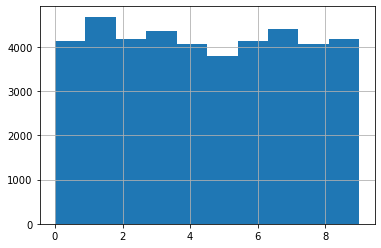

In [5]:

digits_df['label'].hist()
# From visualizing the dataset it is observed that the data is evenly distributed thought the digit 1 has more occurance
# relating to other digits.


In [6]:
# Split data into train and validation set
# you don’t want one fold to be missing some digits). Moreover, some learning algorithms are sensitive to the order of the train set
# instances, and they perform poorly if they get many similar instances in a row. Shuffling the dataset ensures that this won’t happen



split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, val_index in split.split(digits_df, digits_df['label']):
    
    split_train = digits_df.iloc[train_index]
    split_val = digits_df.iloc[val_index]
    
    
    
print(f'Distribution of digit_cat on train set : \n {split_train.label.value_counts()/len(split_train)}')

print()

print(f'Distribution of digit_cat on test set : \n {split_val.label.value_counts()/len(split_val)}')


Distribution of digit_cat on train set : 
 1    0.111518
7    0.104792
3    0.103601
9    0.099702
2    0.099464
6    0.098482
0    0.098393
4    0.096964
8    0.096726
5    0.090357
Name: label, dtype: float64

Distribution of digit_cat on test set : 
 1    0.111548
7    0.104762
3    0.103571
9    0.099762
2    0.099405
6    0.098571
0    0.098333
4    0.096905
8    0.096786
5    0.090357
Name: label, dtype: float64


In [7]:
# Working with the train data sets 

split_train.shape

(33600, 785)

In [10]:
train_copy = split_train.copy()

X_train = train_copy.drop(columns='label')

y_train = train_copy.label

In [11]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
6783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21576,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_train.shape

(33600, 784)

In [13]:
y_train.head(3)

6783     2
25245    3
21576    6
Name: label, dtype: int64

In [12]:
#There are 33,600 images, and each image has 784 features in the training dataset. This is because each image
#is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black). 
#Let’s take a peek at one digit from the dataset."""

Image label : 2


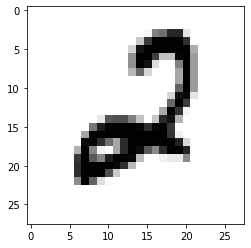

In [14]:
some_data = X_train.iloc[0, ::]

some_data = np.array(some_data)
some_digits = some_data.reshape(28,28)

some_label = y_train.iloc[0]
some_label

print(f'Image label : {some_label}')
plt.imshow(some_digits, cmap = plt.cm.binary, interpolation="nearest")

# This image looks like a 2 and indeed it is the value 2

In [15]:
# Display all columns to identify the value range of each pixel
pd.set_option('display.max_columns', None)
train_copy.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [ ]:
# Using a Pipeline to convert the data to an array and then scale the data 


In [27]:

def dataframe_to_array(df):
    
    df = np.array(df)
    
    return df


X_train_array = dataframe_to_array(X_train)
y_train_array = dataframe_to_array(y_train)

In [30]:
scale_pipe = Pipeline([('std_scaler', StandardScaler()),])

# Copy the data set and transform it using the generated pipeline
# The pixel range are from 0 to 255. Scaling this value would yield better performance to the model

scaled_x_train = scale_pipe.fit_transform(X_train_array)


In [32]:
# Ensure the data are successfully scaled
scaled_x_train[0].max()

5.75159096639272

In [35]:
# Since we are dealing with a multiclass classification a binary model wont be able to provide a good perormace 
# We would choose a model that provides One of the OVO Or OVA abilities

knn = KNeighborsClassifier()

stra_kfold = StratifiedKFold(n_splits=3)


for training_index, testing_index in stra_kfold.split(scaled_x_train, y_train_array):
    
    X_train_fold = scaled_x_train[training_index]
    y_train_fold = y_train_array[training_index]
    X_test_fold = scaled_x_train[testing_index]
    y_test_fold = y_train_array[testing_index]
    
    knn.fit(X_train_fold, y_train_fold)
    y_preg = knn.predict(X_test_fold)
    n_sum = sum(y_preg == y_test_fold)
    print(n_sum / len(y_preg))




0.9289285714285714
0.9305357142857142
0.9290178571428571


In [36]:
# Test prediction with validation set 

val_data = split_val.copy()

val_data.shape

(8400, 785)

In [38]:
val_x = val_data.drop(columns='label')

val_y = val_data['label']

In [39]:
val_x_array = dataframe_to_array(val_x)

val_y_array = dataframe_to_array(val_y)



In [40]:
scale_x_val = scale_pipe.fit_transform(val_x_array)

In [41]:
val_y_preg = knn.predict(scale_x_val)

In [46]:
sum_accurate = (val_y == val_y_preg)

accuracy = sum(sum_accurate) / len(val_y)

print(accuracy)

0.9336904761904762


In [47]:
# With a 93% accuracy is safe to say the model performance well.
# Let now import our test data and make predictions 

test_data = pd.read_csv('test.csv')

In [48]:
test_data.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

In [49]:
# Transform the test data 
test_data1 = test_data.copy()
test_array = dataframe_to_array(test_data1)

In [51]:
# Scale the test data
scale_test_array = scale_pipe.fit_transform(test_array)

In [53]:
# Ensure the test data was successfully scaled
scale_test_array[0].max()

6.568796584410023

In [54]:
y_test_predict = knn.predict(scale_test_array)

In [63]:
index = []

for i in range (1, 28001):
    index.append(i)

In [73]:
test_y2 = pd.DataFrame(y_test_predict, index)

test_y2.head(2)

test_y2.columns = ['Label']

submission_y2 = test_y2.to_csv('digits_data2.csv')

In [44]:
# Using the validation dataset let's see how well the model is able to generalize


y_val_predict = cross_val_predict(knn, scaled_x_train, y_train_array, cv=3)




In [ ]:
con_mat = confusion_matrix(y_train_fold, y_predict)

con_mat

In [27]:


cross_val_score(knn, X_train_fold, y_train_fold, cv=3, scoring="accuracy")

array([0.9235302 , 0.92393197, 0.9249933 ])

In [ ]:

# List Hyperparameters for tuning

leaf_size = list(range(1, 50, 2))
n_neighbors = list(range(1, 20))
p = [1,2]

# convert to dictionary
hyperparameter = dict(leaf_size= leaf_size, n_neighbors= n_neighbors, p=p)

# clone the KNN model 
knn_2 = clone(knn)
clf = GridSearchCV(knn_2, hyperparameter, cv=5)

# Fit the model 
best_model = clf.fit(X_train_fold, y_train_fold)

In [58]:
# Confusion matrix would give us a general idea of  the distribution and how many times our model misrepresented the data
# Using a cross val predict to impute the confusion matrix, this is similar to cross val score but rather than outputting
# the accuracy score it outputs the predicted value





array([[2079,    1,    9,   10,    1,   28,   23,    7,   41,    5],
       [   1, 2343,   28,   10,    3,   13,    3,    3,   91,    3],
       [   8,   21, 1922,   59,   27,   16,   38,   44,   84,    9],
       [   6,   13,   93, 1932,    3,  129,    9,   29,   83,   24],
       [   4,   11,   14,    9, 1964,   14,   13,   18,   46,   79],
       [  24,    9,   30,   76,   36, 1670,   28,   11,  107,   33],
       [   9,    5,   43,   14,   21,   60, 1997,    3,   52,    2],
       [   9,    8,   38,   28,   18,   15,    2, 2123,   26,   80],
       [   8,   39,   44,   85,   18,  125,    9,   15, 1778,   46],
       [  12,   13,    9,   41,   94,   53,    1,  123,   86, 1801]],
      dtype=int64)

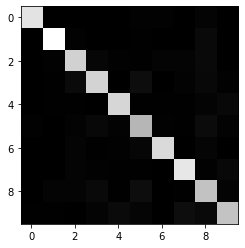

In [59]:
# For a better visualization

plt.imshow(con_mat, cmap=plt.cm.gray)

In [ ]:
# This confusion matrix looks fairly good, since most images are on the main diagonal,
# which means that they were classified correctly.

